In [ ]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
from lang_sam import LangSAM

def save_mask(mask_np, filename):
    mask_image = Image.fromarray((mask_np * 255).astype(np.uint8))
    mask_image.save(filename)

def print_bounding_boxes(boxes):
    print("Bounding Boxes:")
    for i, box in enumerate(boxes):
        print(f"Box {i+1}: {box}")

def print_detected_phrases(phrases):
    print("\nDetected Phrases:")
    for i, phrase in enumerate(phrases):
        print(f"Phrase {i+1}: {phrase}")

def print_logits(logits):
    print("\nConfidence:")
    for i, logit in enumerate(logits):
        print(f"Logit {i+1}: {logit}")

def find_coin_masks(image):
    # Suppress warning messages
    warnings.filterwarnings("ignore")
    text_prompt = "coin"
    try:
        model = LangSAM()
        masks, boxes, phrases, logits = model.predict(image, text_prompt)

        if len(masks) == 0:
            print(f"No objects of the '{text_prompt}' prompt detected in the image.")
        else:
            # Convert masks to numpy arrays
            masks_np = [mask.squeeze().cpu().numpy() for mask in masks]
            return masks_np

    except (requests.exceptions.RequestException, IOError) as e:
        print(f"Error: {e}")


# returns y_min, y_max, x_min, x_max
def find_boundary_of_coin(nonzero_indices):
    return nonzero_indices[0,:].min(), nonzero_indices[0,:].max(), nonzero_indices[1,:].min(), nonzero_indices[1,:].max()

In [ ]:
image_dir = "coin_images/1e/IMG_4197.JPG"
image = Image.open(image_dir).convert("RGB")
masks = find_coin_masks(image)
image = np.array(image)

In [52]:
y_rads = []
x_rads = []
for index in range(len(masks)):
    mask = np.broadcast_to(np.expand_dims(masks[index],-1), image.shape)
    masked_image = mask * image
    nonzero_indices = np.nonzero(masked_image[:,:,0])
    nonzero_indices = np.array(nonzero_indices)
    y_min, y_max, x_min, x_max = find_boundary_of_coin(nonzero_indices)
    y_rads.append(y_max-y_min)
    x_rads.append(x_max-x_min)

largest_coin_index = np.argmax(y_rads) # in y_rads
largest_coin_y_size = y_rads[largest_coin_index]
largest_coin_x_size = x_rads[largest_coin_index]


coins = []
for index in range(len(masks)):
    mask = np.broadcast_to(np.expand_dims(masks[index],-1), image.shape)
    masked_image = mask * image
    nonzero_indices = np.nonzero(masked_image[:,:,0])
    nonzero_indices = np.array(nonzero_indices)
    y_min, y_max, x_min, x_max = find_boundary_of_coin(nonzero_indices)
    masked_image = masked_image[y_min:y_max,x_min:x_max]
    difference_y = largest_coin_y_size - y_rads[index]
    difference_x = largest_coin_x_size - x_rads[index]
    if difference_y != 0:
        if difference_y % 2 == 0:
            masked_image = np.pad(masked_image, [(difference_y//2, difference_y//2), (0, 0), (0, 0)])
        else:
            masked_image = np.pad(masked_image, [((difference_y-1)//2, (difference_y-1)//2 + 1), (0, 0), (0, 0)])
    if difference_x != 0:
        if difference_x % 2 == 0:
            masked_image = np.pad(masked_image, [(0, 0), (difference_x//2, difference_x//2), (0, 0)])
        else:
            masked_image = np.pad(masked_image, [(0, 0), ((difference_x-1)//2, (difference_x-1)//2 + 1), (0, 0)])
    coins.append(masked_image)



((379, 374, 3), (379, 374, 3))

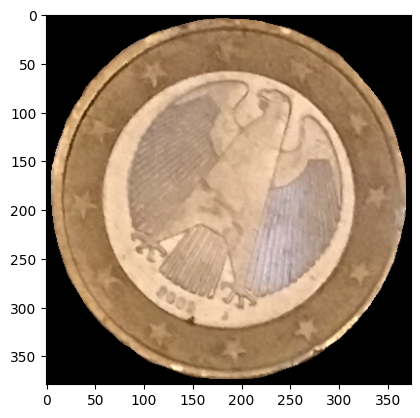

In [59]:
plt.imshow(coins[-1])
coins[-1].shape, coins[0].shape

In [ ]:
y_sizes = []
x_sizes = []
for index in range(len(masks)):
    mask = np.broadcast_to(np.expand_dims(masks[index],-1), image.shape)
    masked_image = mask * image
    nonzero_indices = np.nonzero(masked_image[:,:,0])
    nonzero_indices = np.array(nonzero_indices)
    y_min, y_max, x_min, x_max = find_boundary_of_coin(nonzero_indices)
    y_sizes.append(y_max-y_min)
    x_sizes.append(x_max-x_min)



In [ ]:
y_sizes

In [ ]:
nonzero_indices = np.nonzero(masked_image[:,:,0])
nonzero_indices = np.array(nonzero_indices)



y_min, y_max, x_min, x_max = find_boundary_of_coin(nonzero_indices)
y_min, y_max, x_min, x_max 


In [ ]:
import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

In [ ]:
main
    for images
        masks = find_coin_masks(image)                   --> DONE
        for mask in masks
            masked_image = mask * image                  --> DONE
            zoomed_image = zoom(masked_image)
            resized_zoomed_image = resize(zoomed_image)
            save(resized_zoomed_image)